In [13]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [14]:
CLASS = [["c0", "Safe Driving"], ["c1", "Text"], ["c2", "Phone"], 
         ["c3", "Adjusting Radio"], ["c4", "Drinking"], 
         ["c5", "Reaching Behind"], ["c6", "Hair or Makeup"], 
         ["c7", "Talking to Passenger"]]
TEST_CLS = [os.path.join(os.getcwd(), "Distracted Driver Dataset", "Combined", "test", cls[0]) for cls in CLASS]
TRAIN_CLS = [os.path.join(os.getcwd(), "Distracted Driver Dataset", "Combined", "train", cls[0]) for cls in CLASS]
for cls_path in TEST_CLS:
  print(cls_path)
  print(len(os.listdir(cls_path)))
for cls_path in TRAIN_CLS:
  print(cls_path)
  print(len(os.listdir(cls_path)))

c:\Users\e0817820\Desktop\Y2S2\CS3244\Project 2\Distracted Driver Dataset\Combined\test\c0
346
c:\Users\e0817820\Desktop\Y2S2\CS3244\Project 2\Distracted Driver Dataset\Combined\test\c1
393
c:\Users\e0817820\Desktop\Y2S2\CS3244\Project 2\Distracted Driver Dataset\Combined\test\c2
364
c:\Users\e0817820\Desktop\Y2S2\CS3244\Project 2\Distracted Driver Dataset\Combined\test\c3
170
c:\Users\e0817820\Desktop\Y2S2\CS3244\Project 2\Distracted Driver Dataset\Combined\test\c4
143
c:\Users\e0817820\Desktop\Y2S2\CS3244\Project 2\Distracted Driver Dataset\Combined\test\c5
143
c:\Users\e0817820\Desktop\Y2S2\CS3244\Project 2\Distracted Driver Dataset\Combined\test\c6
146
c:\Users\e0817820\Desktop\Y2S2\CS3244\Project 2\Distracted Driver Dataset\Combined\test\c7
218
c:\Users\e0817820\Desktop\Y2S2\CS3244\Project 2\Distracted Driver Dataset\Combined\train\c0
2640
c:\Users\e0817820\Desktop\Y2S2\CS3244\Project 2\Distracted Driver Dataset\Combined\train\c1
2449
c:\Users\e0817820\Desktop\Y2S2\CS3244\Project 

(1080, 1920)


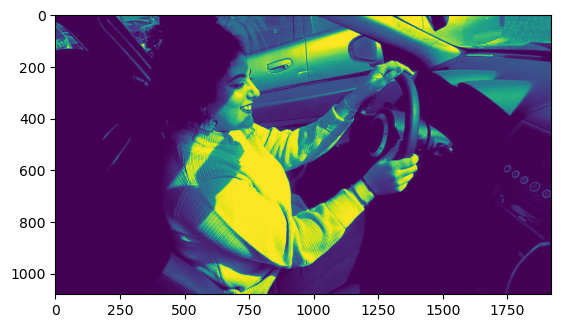

In [25]:
image = cv2.imread(os.path.join(TRAIN_CLS[0], os.listdir(TRAIN_CLS[0])[0]), cv2.IMREAD_GRAYSCALE)
print(image.shape)
plt.imshow(image)

In [31]:
train_paths = []
for cls in range(8):
  for train_instance in os.listdir(TRAIN_CLS[cls]):
    train_paths.append(os.path.join(TRAIN_CLS[cls], instance))

In [32]:
classes = []
for cls in range(8):
  for train_instance in os.listdir(TRAIN_CLS[cls]):
    classes.append(cls)

In [33]:
df = pd.DataFrame({
  'filename': train_paths,
  'class': classes
})
df

,filename,class
0,c:\Users\e0817820\Desktop\Y2S2\CS3244\Project ...,0
1,c:\Users\e0817820\Desktop\Y2S2\CS3244\Project ...,0
2,c:\Users\e0817820\Desktop\Y2S2\CS3244\Project ...,0
3,c:\Users\e0817820\Desktop\Y2S2\CS3244\Project ...,0
4,c:\Users\e0817820\Desktop\Y2S2\CS3244\Project ...,0
...,...,...
12550,c:\Users\e0817820\Desktop\Y2S2\CS3244\Project ...,7
12551,c:\Users\e0817820\Desktop\Y2S2\CS3244\Project ...,7
12552,c:\Users\e0817820\Desktop\Y2S2\CS3244\Project ...,7
12553,c:\Users\e0817820\Desktop\Y2S2\CS3244\Project ...,7


<AxesSubplot:>

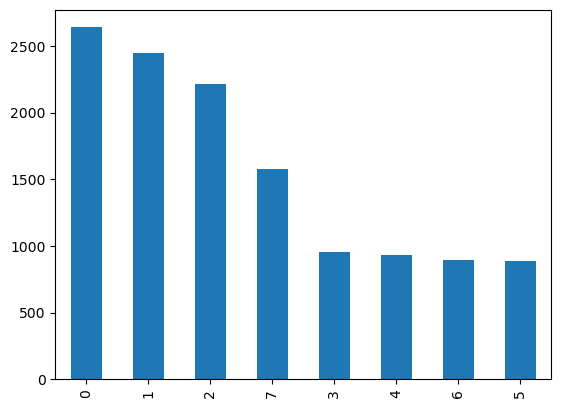

In [34]:
df['class'].value_counts().plot.bar()